In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('heart.csv')

In [6]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [7]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

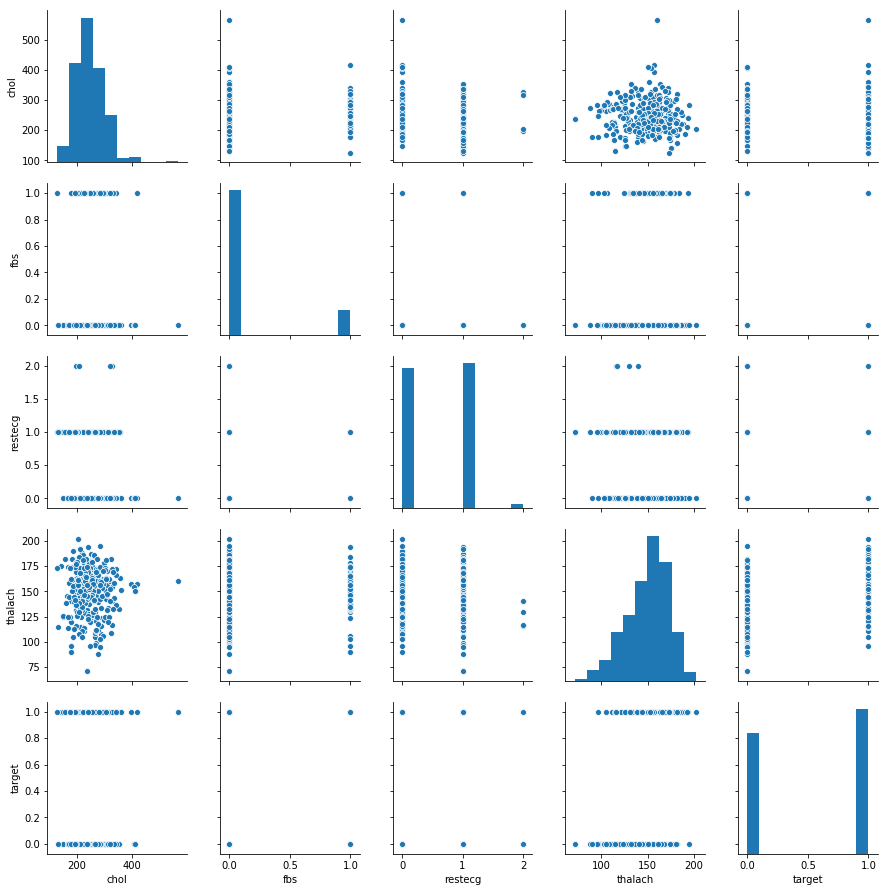

In [8]:
sns.pairplot(df[['chol','fbs','restecg','thalach','target']])

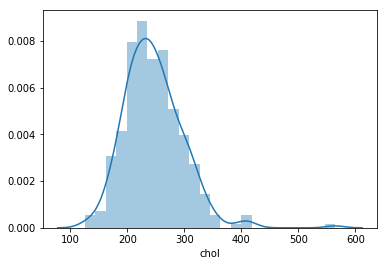

In [9]:
sns.distplot(df['chol'])

In [10]:
df['chol_log'] = np.log(df['chol']+1.0)

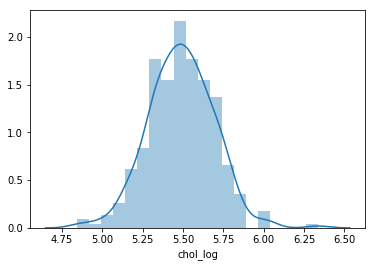

In [11]:
sns.distplot(df['chol_log'])

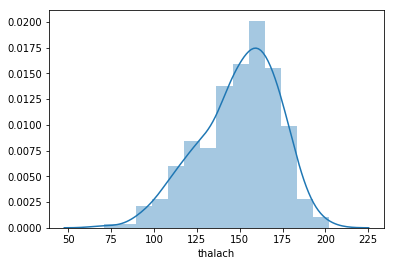

In [12]:
sns.distplot(df['thalach'])

In [13]:
df['thalach_log'] = np.log(df['thalach']+1.0)

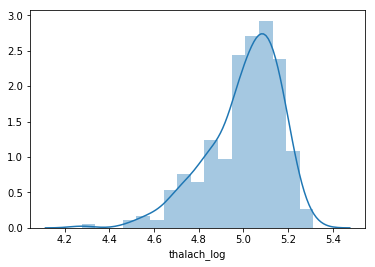

In [14]:
sns.distplot(df['thalach_log'])

In [15]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  chol_log  thalach_log  
0   0     1       1  5.455321     5.017280  
1   0     2       1  5.525453     5.236442  
2   0     2       1  5.323010     5.153292  
3   0     2       1  5.468060     5.187386  
4   0     2       1  5.872118     5.099866

In [16]:
X = df.drop(df[['thalach_log','target','chol']], axis='columns')
X.head()

age  sex  cp  trestbps  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
0   63    1   3       145    1        0      150      0      2.3      0   0   
1   37    1   2       130    0        1      187      0      3.5      0   0   
2   41    0   1       130    0        0      172      0      1.4      2   0   
3   56    1   1       120    0        1      178      0      0.8      2   0   
4   57    0   0       120    0        1      163      1      0.6      2   0   

   thal  chol_log  
0     1  5.455321  
1     2  5.525453  
2     2  5.323010  
3     2  5.468060  
4     2  5.872118

In [17]:
y = df['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
import statsmodels.api as sm 

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=5)

X_train_const = sm.add_constant(X_train)
modelo_stats = sm.OLS(y_train, X_train, hasconst=True).fit()
modelo_stats.summary()

/home/murilomen/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     20.05
Date:                Mon, 27 May 2019   Prob (F-statistic):           3.51e-30
Time:                        18:35:36   Log-Likelihood:                -97.130
No. Observations:                 257   AIC:                             220.3
Df Residuals:                     244   BIC:                             266.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0014      0.003      0.493      0.623      -0.004       0.007
sex           -0.1943      0.051     -3.827      0.000      -0.294      -0.094
cp             0.0975      0.025      3.931      0.000       0.049       0.146
trestbps      -0.0016      0.001     -1.154      0.249      -0.004       0.001
fbs            0.0113      0.065      0.173      0.863      -0.117       0.139
restecg        0.0714      0.044      1.620      0.106      -0.015       0.158
thalach        0.0040      0.001      3.163      0.002       0.002       0.007
exang         -0.1719      0.059     -2.917      0.004      -0.288      -0.056
oldpeak       -0.0596      0.026     -2.332      0.021      -0.110      -0.009
slope          0.0643      0.048      1.332      0.184      -0.031       0.159
ca            -0.0971      0.025     -3.934      0.000      -0.146      -0.048
thal          -0.1266      0.040     -3.183      0.002      -0.205      -0.048
chol_log       0.0821      0.057      1.453      0.147      -0.029       0.193
==============================================================================
Omnibus:                        7.229   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                7.457
Skew:                          -0.400   Prob(JB):                       0.0240
Kurtosis:                       2.766   Cond. No.                         618.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
X = X[['sex','cp','thalach','exang','oldpeak','ca','thal','chol_log']]

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=5)
X_train_const = sm.add_constant(X_train)
modelo_stats = sm.OLS(y_train, X_train, hasconst=True).fit()
modelo_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     33.28
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.76e-32
Time:                        18:35:36   Log-Likelihood:                -100.45
No. Observations:                 257   AIC:                             216.9
Df Residuals:                     249   BIC:                             245.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -0.1983      0.051     -3.923      0.000      -0.298      -0.099
cp             0.0930      0.024      3.797      0.000       0.045       0.141
thalach        0.0042      0.001      3.676      0.000       0.002       0.007
exang         -0.1929      0.058     -3.307      0.001      -0.308      -0.078
oldpeak       -0.0799      0.022     -3.686      0.000      -0.123      -0.037
ca            -0.0954      0.024     -3.979      0.000      -0.143      -0.048
thal          -0.1280      0.040     -3.221      0.001      -0.206      -0.050
chol_log       0.0834      0.037      2.255      0.025       0.011       0.156
==============================================================================
Omnibus:                        5.837   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.998
Skew:                          -0.363   Prob(JB):                       0.0498
Kurtosis:                       2.815   Cond. No.                         413.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
modelo = MultinomialNB()

In [25]:
modelo.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
y_predict = modelo.predict(X_test)

In [27]:
'A eficiencia do modelo é de: '+ str(np.round((len(y_test)-sum(np.abs(y_test - y_predict)))/len(y_test) * 100, 2)) + '%'

'A eficiencia do modelo é de: 86.96%'

In [28]:
from sklearn.ensemble import AdaBoostClassifier
modelo2 = AdaBoostClassifier()

In [29]:
modelo2.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [30]:
y_predict2 = modelo2.predict(X_test)

In [31]:
'A eficiencia do modelo é: '+ str(np.round((len(y_test)-sum(np.abs(y_test - y_predict2)))/len(y_test) * 100, 2)) + '%'

'A eficiencia do modelo é: 86.96%'

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
cm = confusion_matrix(y_test,y_predict) # NB
cm2 = confusion_matrix(y_test,y_predict2) # Adaboost

## Matriz de confusão

É interessante observar a matriz de confusão para se ter uma ideia da proporção do teste que ficou como falso negativo, que no caso de doenças, é o fator agravante para o modelo.

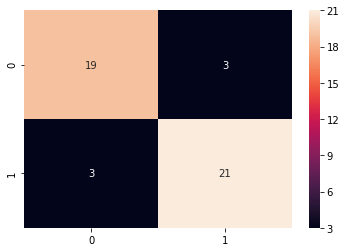

In [34]:
sns.heatmap(cm, annot=True)

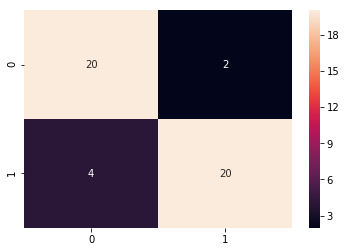

In [35]:
sns.heatmap(cm2, annot=True)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
acc1 = accuracy_score(y_test,y_predict)
acc2 = accuracy_score(y_test,y_predict2)

In [38]:
'A acurácia do NB é de ' + str(np.round(acc1*100,2)) + '%'

'A acurácia do NB é de 86.96%'

In [39]:
'A acurácia do AdaBoost é de ' + str(np.round(acc2*100,2)) + '%'

'A acurácia do AdaBoost é de 86.96%'

## Regressão logística

Neste ponto, é interessante de se analisar o comportamento das variáveis contínuas com o nosso valor target para identificar se elas se comportam de modo que a regressão logística seja mais eficiente. Como será identificado nos gráficos plotados, é bastante difícil de dizer que elas possuem essa relação.

In [40]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'chol_log',
       'thalach_log'],
      dtype='object')

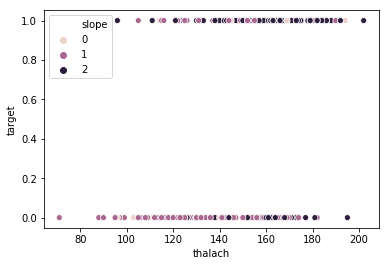

In [41]:
sns.scatterplot(x='thalach',y='target', hue='slope', data=df)

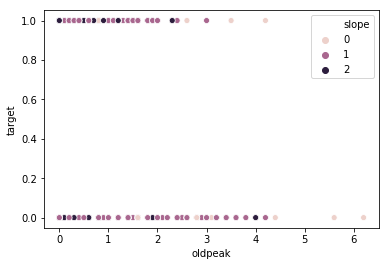

In [42]:
sns.scatterplot(x='oldpeak',y='target',hue='slope', data=df)

## Modelo alternativo

Como ainda se está bastante longe da meta de se atingir um modelo com >95% de acerto, então é necessário pensar em um modelo de classificação mais robusto e que convirja mais rápido. Para isso, vamos agora analisar o XG Boost Classifier, que é um classificador baseado na biblioteca de mesmo nome. O princípio que rege esse modelo é o do gradiente descendente. 

In [43]:
from xgboost import XGBClassifier

In [44]:
modelo3 = XGBClassifier()

In [76]:
X = df[['sex','cp','thalach','exang','oldpeak','ca','thal','chol']]
y = df['target']

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=5)

In [78]:
modelo3.fit(X_train,y_train)
y_predict3 = modelo3.predict(X_test)

In [79]:
acc3 = accuracy_score(y_test,y_predict3)

In [80]:
'A acurácia do XGBoost é de ' + str(np.round(acc3*100,2)) + '%'

'A acurácia do XGBoost é de 85.25%'